In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv("/content/creditcard.csv")

In [12]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23853,32953,1.296815,-0.518508,0.348800,0.129750,-0.845934,-0.283287,-0.463165,-0.007344,-0.530097,0.611994,-0.839572,-0.238255,-0.682034,0.040107,-0.091270,-2.144114,0.657199,0.305925,-0.899906,-0.604168,-0.498652,-0.791893,0.058456,0.067753,0.367979,0.400899,0.005089,0.008846,14.00,0.0
23854,32954,1.295646,-0.699613,-1.129649,-2.505043,1.428275,3.010605,-0.892932,0.798386,1.309837,-0.970178,0.105836,0.426482,0.134841,0.265772,2.125626,0.109390,-0.779939,0.611425,0.872506,0.124240,0.071540,0.120545,-0.144172,1.066577,0.615628,0.123208,0.013875,0.018547,37.07,0.0
23855,32954,-1.691394,-1.452403,1.671861,-1.769590,1.636843,-0.943701,0.193116,-0.712756,-0.987725,1.101270,0.734150,-0.882691,-0.181673,-0.712363,-0.272218,1.351824,-0.783870,-0.593984,0.797110,0.092588,0.047745,0.539167,-0.698010,-0.470563,0.621828,-0.254508,-0.724865,-0.360165,53.80,0.0
23856,32954,1.112786,0.062772,1.481419,2.922471,-0.905121,0.366357,-0.670663,0.256586,0.599399,0.411398,-1.515738,-0.163763,-1.048557,-0.540107,-1.385328,0.073163,0.056735,-0.196746,-0.559959,-0.247537,0.010125,0.346740,-0.117334,0.416103,0.586102,0.216021,0.042710,0.024984,0.00,0.0


In [13]:
x = df.corrwith(train["Class"]).to_dict()

In [14]:
del x['Class']

In [15]:
features = []
for k,v in x.items():
    if abs(v)>0.1:
        print(f"{k} : {v:.2f}")
        features.append(k)

V1 : -0.27
V2 : 0.25
V3 : -0.46
V4 : 0.25
V5 : -0.25
V6 : -0.12
V7 : -0.37
V8 : 0.19
V9 : -0.17
V10 : -0.35
V11 : 0.27
V12 : -0.31
V14 : -0.43
V16 : -0.32
V17 : -0.42
V18 : -0.20
V27 : 0.13


In [16]:
x = df[features]
y = df['Class']

In [17]:
y.value_counts()

0.0    23769
1.0       88
Name: Class, dtype: int64

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [26]:
# splitting the dataset into train and test dataset with 4:1 ratio (80%-20%)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 26)

In [33]:
from sklearn.linear_model import LogisticRegression
# Create instance of model
lreg = LogisticRegression()
# Pass training data into model
lreg.fit(x_test,y_test)

LogisticRegression()

In [34]:
# Getting prediciton on x_test
y_pred_lreg = lreg.predict(x_test)

In [35]:
# Scoring our model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score, precision_score, recall_score

# Confusion Matrix
print('Logistic Regression')
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_lreg))
print('--'*50)

# Classification Report
print('Classification Report')
print(classification_report(y_test,y_pred_lreg))


# Accuracy of our model
print('--'*50)
logreg_accuracy = round(accuracy_score(y_test, y_pred_lreg) * 100,8)
print('Accuracy = ', logreg_accuracy,'%')

Logistic Regression


Confusion Matrix
[[4752    1]
 [   7   12]]
----------------------------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4753
         1.0       0.92      0.63      0.75        19

    accuracy                           1.00      4772
   macro avg       0.96      0.82      0.87      4772
weighted avg       1.00      1.00      1.00      4772

----------------------------------------------------------------------------------------------------
Accuracy =  99.83235541 %


In [37]:
%%time
from sklearn.svm import SVC
# Instantiate the model
svc = SVC()
# Fit the model on training data
svc.fit(x_test, y_test)

CPU times: user 65.1 ms, sys: 721 µs, total: 65.8 ms
Wall time: 71.9 ms


In [38]:
# Getting the predictions for x_test
y_pred_svc = svc.predict(x_test)

In [39]:
print('Support Vector Classifier')
print('\n')
# Confusion matrix
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_svc))
print('--'*50)

# Classification report
print('Classification Report')
print(classification_report(y_test, y_pred_svc))

# Accuracy
print('--'*50)
svc_accuracy = round(accuracy_score(y_test, y_pred_svc)*100,8)
print('Accuracy = ', svc_accuracy,'%')

Support Vector Classifier


Confusion Matrix
[[4753    0]
 [   4   15]]
----------------------------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4753
         1.0       1.00      0.79      0.88        19

    accuracy                           1.00      4772
   macro avg       1.00      0.89      0.94      4772
weighted avg       1.00      1.00      1.00      4772

----------------------------------------------------------------------------------------------------
Accuracy =  99.9161777 %


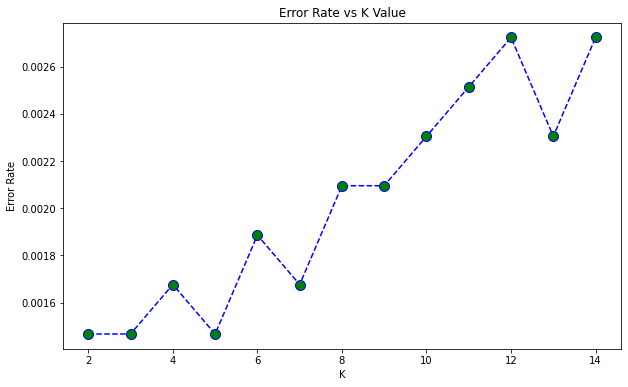

In [42]:

from sklearn.neighbors import KNeighborsClassifier

# in knn we need to select a value of nearest neighbour, for now lets use a for loop. If accuarcy
# is better than other models then we would search for optimal parameter

error_rate = []

for i in range (2,15):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_test, y_test)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

# Plot error rate
plt.figure(figsize = (10,6))
plt.plot(range(2,15), error_rate, color = 'blue', linestyle = '--', marker = 'o', 
        markerfacecolor = 'green', markersize = 10)

plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [44]:
# now using above data to train with n_neighbors having least error rate

n_value = 0
min_error = float('inf')
for idx,error in enumerate(error_rate):
    if min_error>error:
        min_error=error
        n_value=idx+2

knn = KNeighborsClassifier(n_neighbors = n_value)
# Fit new KNN on training data
knn.fit(x_test, y_test)

KNeighborsClassifier(n_neighbors=2)

In [45]:
# Predict KNN
y_pred_knn_op = knn.predict(x_test)

In [47]:
print('K-Nearest Neighbors(KNN)')
print('k =',n_value)

# Confusion Matrix
print('\n')
print(confusion_matrix(y_test, y_pred_knn_op))

# Classification Report
print('--'*50)
print('Classfication Report',classification_report(y_test, y_pred_knn_op))

# Accuracy
print('--'*50)
knn_op_accuracy =round(accuracy_score(y_test, y_pred_knn_op)*100,8)
print('Accuracy = ',knn_op_accuracy,'%')


K-Nearest Neighbors(KNN)
k = 2


[[4753    0]
 [   7   12]]
----------------------------------------------------------------------------------------------------
Classfication Report               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4753
         1.0       1.00      0.63      0.77        19

    accuracy                           1.00      4772
   macro avg       1.00      0.82      0.89      4772
weighted avg       1.00      1.00      1.00      4772

----------------------------------------------------------------------------------------------------
Accuracy =  99.85331098 %


In [49]:
from sklearn.ensemble import RandomForestClassifier

# Create model object
rfc = RandomForestClassifier(n_estimators = 250,n_jobs=-1)
# Fit model to training data
rfc.fit(x_test,y_test)
y_pred_rfc = rfc.predict(x_test)

In [50]:
print('Random Forest')
# Confusion matrix
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_rfc))

# Classification report
print('--'*50)
print('Classification Report')
print(classification_report(y_test, y_pred_rfc))

# Accuracy
print('--'*50)
rf_accuracy = round(accuracy_score(y_test, y_pred_rfc)*100,8)
print('Accuracy = ', rf_accuracy,'%')

Random Forest


Confusion Matrix
[[4753    0]
 [   0   19]]
----------------------------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4753
         1.0       1.00      1.00      1.00        19

    accuracy                           1.00      4772
   macro avg       1.00      1.00      1.00      4772
weighted avg       1.00      1.00      1.00      4772

----------------------------------------------------------------------------------------------------
Accuracy =  100.0 %


In [51]:
from xgboost import XGBClassifier

# Create model object
xgb = XGBClassifier(n_jobs=-1)

# Fit model to training data
xgb.fit(x_train, y_train)
y_pred_xgb = xgb.predict(x_test)

In [52]:
print('XGBoost Classifer')
# Confusion matrix
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_xgb))

# Classification report
print('--'*50)
print('Classification Report')
print(classification_report(y_test, y_pred_xgb))

# Accuracy
print('--'*50)
xgb_accuracy = round(accuracy_score(y_test, y_pred_xgb)*100,8)
print('Accuracy = ', xgb_accuracy,'%')

XGBoost Classifer


Confusion Matrix
[[4749    4]
 [   5   14]]
----------------------------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4753
         1.0       0.78      0.74      0.76        19

    accuracy                           1.00      4772
   macro avg       0.89      0.87      0.88      4772
weighted avg       1.00      1.00      1.00      4772

----------------------------------------------------------------------------------------------------
Accuracy =  99.81139983 %


In [53]:
models = pd.DataFrame({
     'Model': ['Logistic Regression', 'Linear SVC', 
               'K-Nearest Neighbors', 'Random Forest','XGBoost Classifier'],
    'Score': [logreg_accuracy, svc_accuracy, 
               knn_op_accuracy, rf_accuracy,xgb_accuracy]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,100.000000
1,Linear SVC,99.916178
2,K-Nearest Neighbors,99.853311
0,Logistic Regression,99.832355
4,XGBoost Classifier,99.811400
